前置操作：
1. 计算样本熵，导出特征工程后的数据

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tqdm
import re
from sklearn import preprocessing
import librosa
from imblearn.combine import *
from sklearn.model_selection import *

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
palette = 'deep'
sns.set(font='SimHei', font_scale=1.2, palette=palette)  # 解决Seaborn中文显示问题

In [22]:
df = pd.read_excel('../数据预处理/svmDf.xlsx')
df

,静态系数,一阶差分,二阶差分,人工地震
0,2.313697,2.312667,2.236966,0
1,2.365711,2.352702,2.274795,0
2,2.349605,2.331472,2.244524,0
3,2.354266,2.284682,2.217881,0
4,2.398041,2.367101,2.275127,0
...,...,...,...,...
165,2.019267,2.585894,2.332974,1
166,2.271963,2.598065,2.316562,1
167,2.345049,2.597429,2.317779,1
168,2.341758,2.597124,2.312072,1


In [23]:
X, y = df.iloc[:, :3], df['人工地震']
X

,静态系数,一阶差分,二阶差分
0,2.313697,2.312667,2.236966
1,2.365711,2.352702,2.274795
2,2.349605,2.331472,2.244524
3,2.354266,2.284682,2.217881
4,2.398041,2.367101,2.275127
...,...,...,...
165,2.019267,2.585894,2.332974
166,2.271963,2.598065,2.316562
167,2.345049,2.597429,2.317779
168,2.341758,2.597124,2.312072


In [24]:
# 使用采样-SMOTE ENN
smote_enn = SMOTEENN()
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X, y)

# 打印采样后的样本数量
print("采样前的样本数量：", len(X))
print("采样后的样本数量：", len(X_train_resampled))

采样前的样本数量： 170
采样后的样本数量： 273


In [25]:
y_train_resampled.value_counts()

人工地震
1    138
0    135
Name: count, dtype: int64

In [26]:
resampledDf = X_train_resampled.join(y_train_resampled)
resampledDf

,静态系数,一阶差分,二阶差分,人工地震
0,2.313697,2.312667,2.236966,0
1,2.365711,2.352702,2.274795,0
2,2.349605,2.331472,2.244524,0
3,2.354266,2.284682,2.217881,0
4,2.398041,2.367101,2.275127,0
...,...,...,...,...
268,2.135394,2.588333,2.329627,1
269,2.335600,2.598975,2.312442,1
270,2.386191,2.599487,2.305581,1
271,2.148593,2.600077,2.332404,1


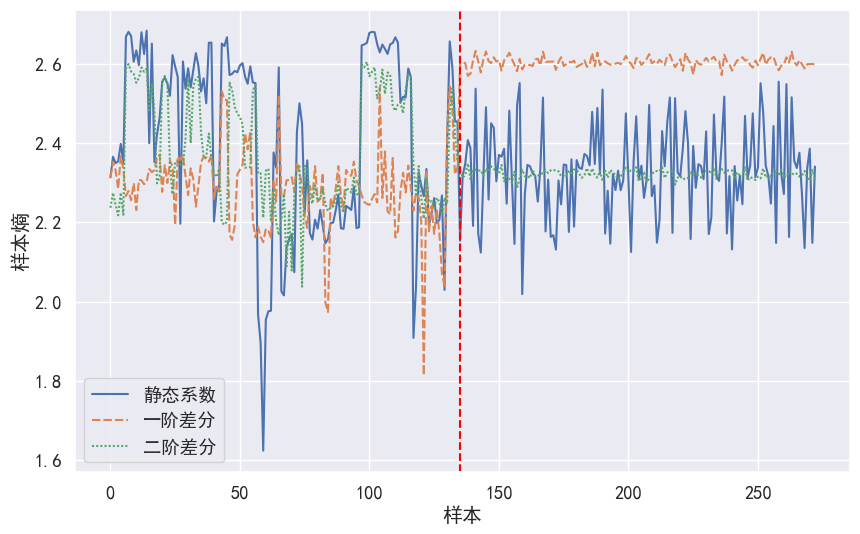

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(resampledDf.iloc[:, :-1])
plt.axvline(x=135, color='red', linestyle='--')
plt.ylabel('样本熵')
plt.xlabel('样本')
plt.show()

In [28]:
resampledDf.to_excel('样本均衡后svm数据.xlsx', index=False)